> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have choosed to use the no show appointments, as it relevant to my field of work, and I have been alwasy wondering how can we predict the no show, so here is my analysis for this data set.

#### Main Questions I tried to answer:
1. Does the time delta (Wait Time) between the Scd_day and app_day is a reason for no show  ?
2. what is the impact of the patient age on the show and no show?

#### Some other question I thought about: 
3. Does the patient area has any relevance to the no show ?


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time as t
import datetime as dt
from datetime import date

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#df = pd.read_csv('modified_no_show_dataset.csv')

<a id='wrangling'></a>
## Data Wrangling & Cleaning

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_pat = df.PatientId.astype(int,inplace=True)
df['PatientId'] = df_pat
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**I converted the patient_id to int to get rid of the decimal format**

In [31]:
cols = df.columns
new_cols = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship',
            'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']
df.columns = new_cols
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Changed the column names to make sure its all following the same pattern and causes no issues in futher processing**

In [32]:
#changing cols [6:] to boolean
df.scholarship = df.scholarship.astype(bool,inplace =True)
df.hipertension = df.hipertension.astype(bool,inplace = True)
df.diabetes = df.diabetes.astype(bool, inplace = True)
df.alcoholism = df.alcoholism.astype(bool, inplace = True)
df.sms_received = df.sms_received.astype(bool,inplace = True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No


**Changed the columns with '1' and '0' to boolean for more consistency in the DataSet**

In [33]:
df.no_show.replace('Yes', True, inplace= True)

df.no_show.replace('No', False, inplace= True)


**Changed the no_show column also to Boolean**

In [37]:
df.shape

(110527, 14)

**Checking some characteristics of the DataSet**

In [3]:
df.isnull().sum()

Unnamed: 0         0
patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
dtype: int64

**Checking some characteristics of the DataSet**

In [4]:
df.nunique()

Unnamed: 0         110527
patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

**Checking some characteristics of the DataSet**

In [38]:
new_schd_day = []
for day in df.scheduled_day:
    d = dt.datetime.strptime(day, '%Y-%m-%dT%H:%M:%SZ')
    new_schd_day.append(d.strftime('%Y-%m-%d %H:%M:%S'))
new_schd_day[:5]
df.scheduled_day = new_schd_day

__Working on the Date and Time format to be standrized__

In [39]:
new_appt_day = []
for day in df.appointment_day:
    d = dt.datetime.strptime(day, '%Y-%m-%dT%H:%M:%SZ')
    new_appt_day.append(d.strftime('%Y-%m-%d'))
new_appt_day[:5]
df.appointment_day = new_appt_day

__Working on the Date and Time format to be standrized__

In [40]:
# df = df.drop(df.age == -1, inplace = True)
df.drop(df[df.age == -1].index, inplace=True)
df.reset_index(drop=True,inplace=True)

**Droping any record with -1 as age, eventhoug it should not affect the statistics, but for age groups**

In [41]:
df_new = pd.read_csv('appt_day_less_schd_day.csv')
to_be_removed = df_new.appointment_id
appt_id = df.query('appointment_id in @to_be_removed').appointment_id
df.drop(appt_id.index,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,0,False,False
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,0,False,True
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,0,False,True
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,False
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,0,False,False


**Cleaning up records with scheduled_day > appointmet_day**

In [43]:
#adding time delta 'wait_time' column to the Data Set

appt_day = pd.to_datetime(df.appointment_day)
schd_day = pd.to_datetime(df.scheduled_day)

df['wait_time'] = appt_day.dt.date - schd_day.dt.date

df.wait_time = df.wait_time.astype('timedelta64[D]',inplace=True)
df.wait_time = df.wait_time.astype(int)
df.head(100)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait_time
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,0
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,0,False,False,2
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,0,False,True,2
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,0,False,True,2
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,False,0
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,0,False,False,2


**Adding another column to the dataset 'wait_time**

In [44]:
# Adding another column that has the age groups
df['age_group'] = (df.age.apply(lambda x: min(int(x / 10) , 9))
    )
df.age_group.value_counts().sort_index()
type(df.age[5])
df.head(100)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait_time,age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,0,6
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,0,5
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,0,6
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,0,5
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,0,False,False,2,7
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,0,False,True,2,2
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,0,False,True,2,3
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,False,0,2
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,0,False,False,2,1


**Adding another column for age groups**

In [45]:
df.to_csv('modified_no_show_dataset.csv')

**Saving all of these chnages to a new CS file to avoid editing everytime i run the sheet**

## Data Visulization:

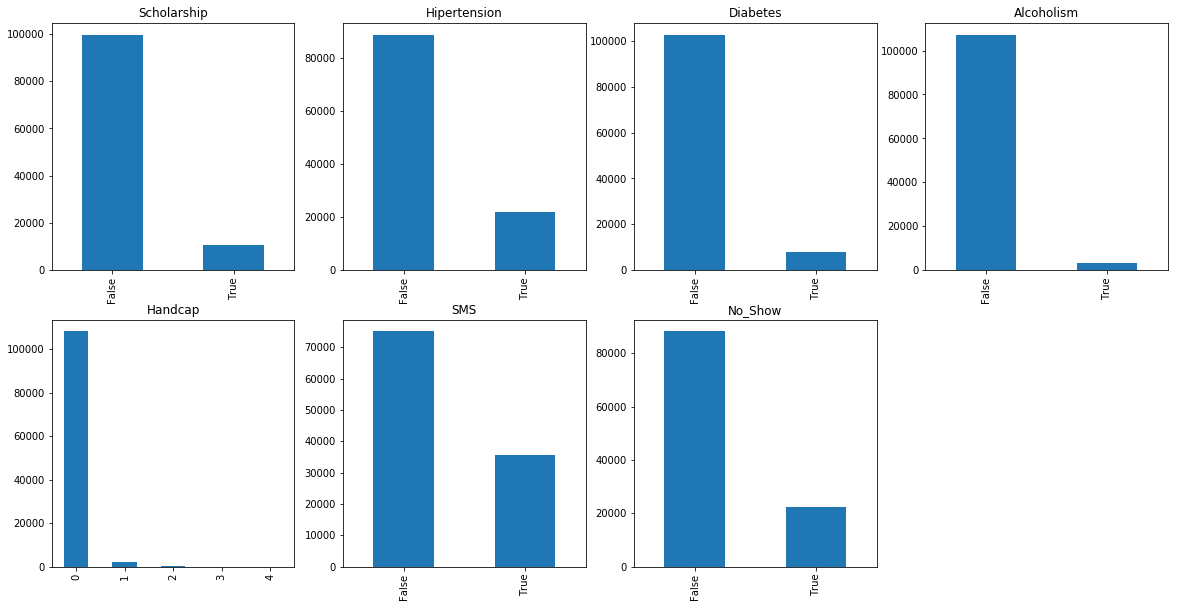

In [46]:
figure = plt.figure(figsize=(20,10))
fig_dim = (2,4)

plt.subplot2grid(fig_dim, (0,0), title='Scholarship')
df.scholarship.value_counts().plot(kind='bar')

plt.subplot2grid(fig_dim, (0,1))
df.hipertension.value_counts().plot(kind='bar', title='Hipertension')

plt.subplot2grid(fig_dim, (0,2))
df.diabetes.value_counts().plot(kind='bar', title='Diabetes')

plt.subplot2grid(fig_dim, (0,3))
df.alcoholism.value_counts().plot(kind='bar', title='Alcoholism')

plt.subplot2grid(fig_dim, (1,0))
df.handcap.value_counts().plot(kind='bar', title='Handcap')

plt.subplot2grid(fig_dim, (1,1))
df.sms_received.value_counts().plot(kind='bar', title='SMS')

plt.subplot2grid(fig_dim, (1,2))
df.no_show.value_counts().plot(kind='bar', title='No_Show')


**Value Counts in bar chart for all of the parameters in the dataset**

Text(0.5,0,'True or Fale')

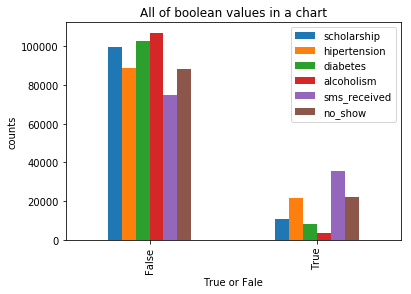

In [15]:
df[['scholarship','hipertension', 'diabetes', 'alcoholism', 'sms_received', 'no_show']].apply(pd.value_counts).plot(kind='bar')
plt.title('All of boolean values in a chart')
plt.ylabel('counts')
plt.xlabel('True or Fale')

**One Bar Chart for all value counts for either True or false**



1. So the percentage of no show is around 25%
2. Number of no shows when message received is 9784 (9%)
3. Number of no shows when message wasn't received is 12535 (11.5%)
4. Number of no shows when patient is not hipertensive is 18547 (16.9%)
5. Number of no shows when patient is not on Scholarshop is 19741 (18%)
6. Number of no shows when patient is not Diabetic is 20889 (19%)
7. Number of no shows when patient is not Alcoholic is 21642 (19.7%)
8. Number of no shows when patient is not handicaped is 21912 (19.9%)


**Some Statistics to allow me to see which parameter alone impact the no_show**

Text(0,0.5,'Number of time each area appeard in the study')

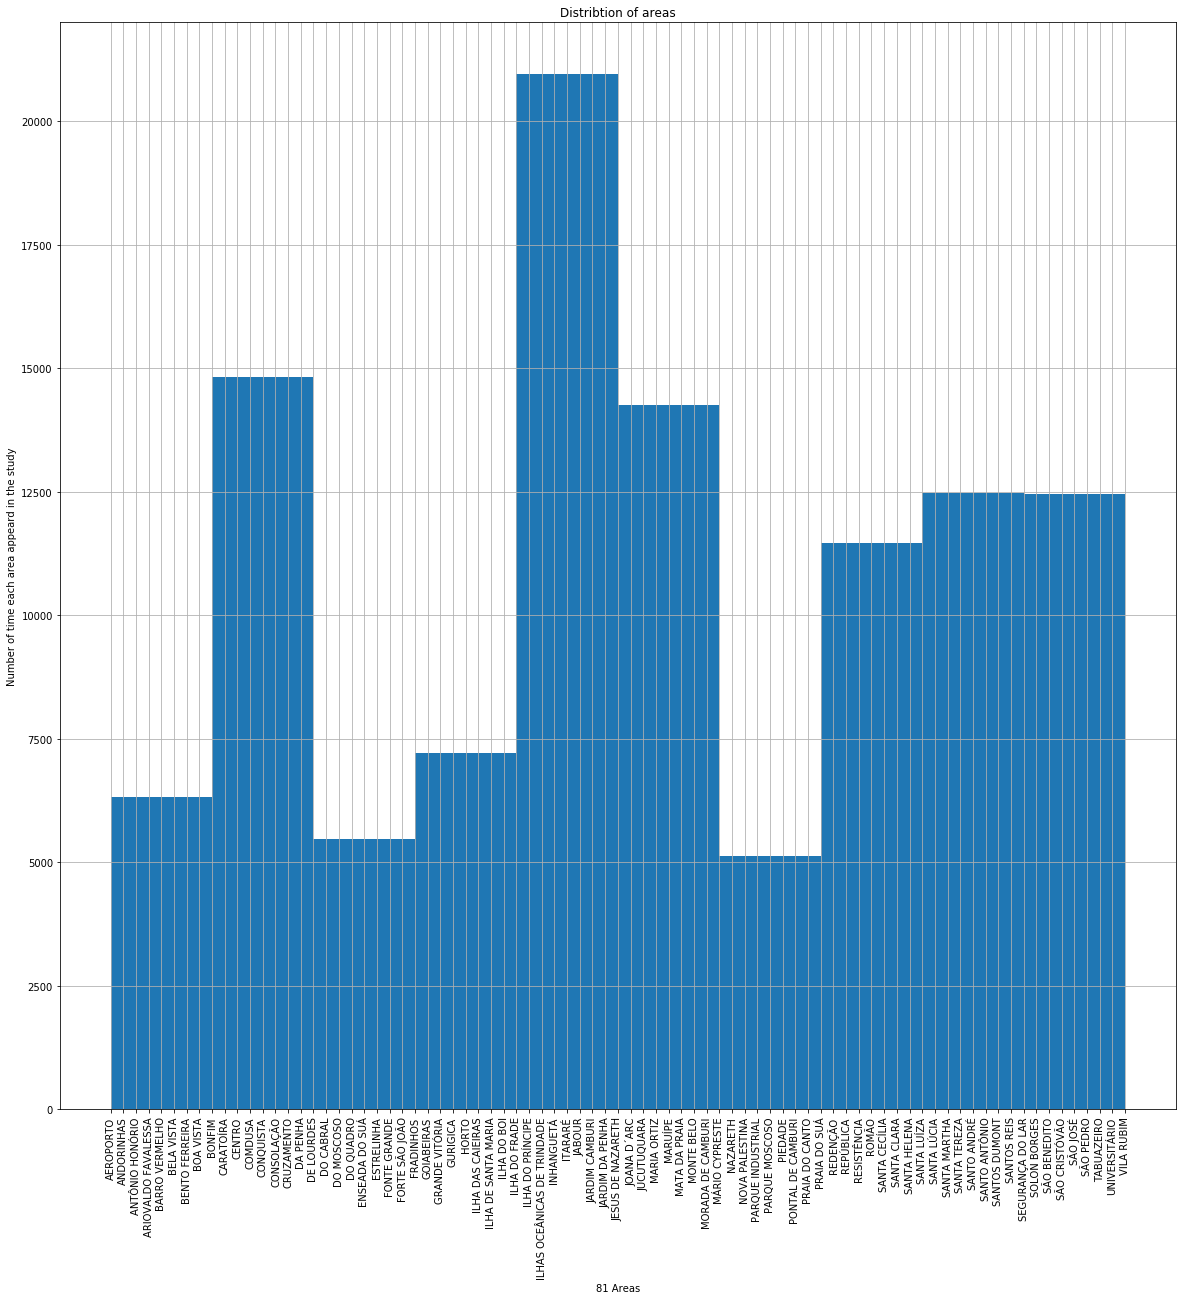

In [13]:
unique_area = list(df.neighbourhood.unique())
x_area = unique_area

df.neighbourhood.hist(figsize=(20,20))
plt.xticks(rotation='vertical');
plt.title('Distribtion of areas')
plt.xlabel('81 Areas')
plt.ylabel('Number of time each area appeard in the study')

In [24]:
df.patient_id.value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
6264198675331      62
258424392677       62
75797461494159     62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
9452745294842      42
81894521843749     42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
986162815579582    34
88834999836575     34
712458866975343    33
6128878448536      30
416755661551767    30
81213966782532     29
8634164126317      24
36994987339512     23
                   ..
29739554385665      1
98683352133221      1
5394313945329       1
48689197872217      1
9675119787546       1
763619586595        1
983874124283357     1
737858311826761     1
8169988527774       1
2212945531847       1
961392519656997     1
271517596623238     1
8249496395977       1
137479426839        1
6529316371

In [25]:
df.wait_time.value_counts()
df.query('no_show').wait_time.value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
6       4037
5       3277
14      2913
3       2737
8       2332
21      1861
28      1706
13      1682
9       1605
15      1503
10      1391
20      1187
22      1173
16      1151
12      1115
17      1107
29      1089
19      1044
18      1021
27      1013
11       987
35       963
23       822
34       808
26       731
       ...  
103        5
109        5
111        5
98         5
95         5
112        5
108        5
96         4
102        4
105        4
119        4
92         3
122        3
107        2
115        2
93         2
94         2
97         2
110        2
126        1
125        1
123        1
117        1
139        1
82         1
101        1
132        1
151        1
146        1
127        1
Name: wait_time, Length: 129, dtype: int64

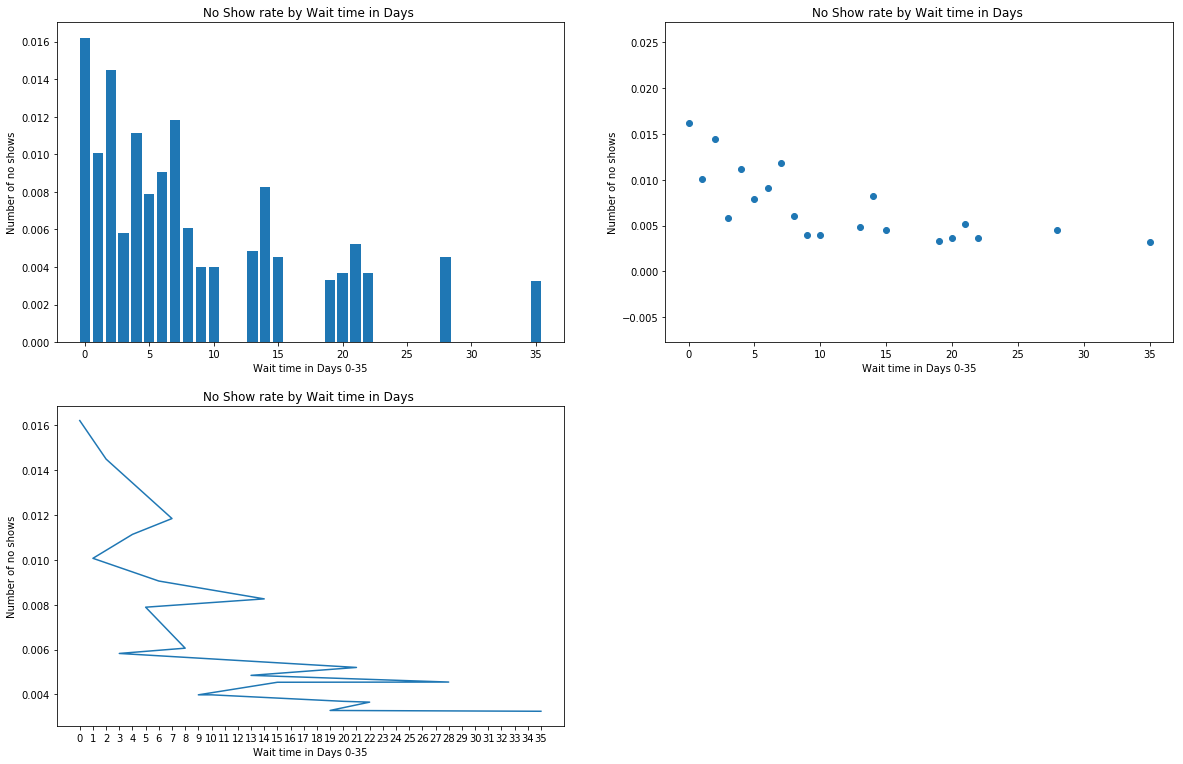

In [9]:


#calculate the rate of wait time to see how does it affect the no_show

rate = df.query('no_show').wait_time.value_counts()[0:20] / df.shape[0]
plt.figure(figsize=(20, 20))
x=df.query('no_show').wait_time.value_counts().index[0:20]
#y=df.query('no_show').wait_time.value_counts().values[0:20]
y=rate
plt.subplot(321)
plt.bar(x,y);
plt.title('No Show rate by Wait time in Days ')
plt.xlabel('Wait time in Days 0-35')
plt.ylabel('Rate of no shows')
plt.subplot(322)
plt.scatter(x,y);
plt.title('No Show rate by Wait time in Days ')
plt.xlabel('Wait time in Days 0-35')
plt.ylabel('Rate of no shows')
plt.subplot(323)
plt.plot(x,y);
plt.xticks(range(0,36));
plt.title('No Show rate by Wait time in Days ')
plt.xlabel('Wait time in Days 0-35')
plt.ylabel('Rate of no shows')
plt.show()


**The Above plot show the wait days rate with no show and 0 wait days are the most affecting**

Text(0,0.5,'No Show Rate')

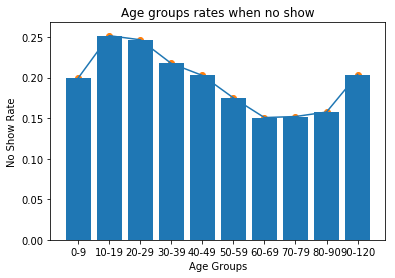

In [4]:
val = []
for i in range(0,10):
    val.append((df[df.age_group == i].query('no_show').count()/df[df.age_group == i].count() )[0])

plt.bar([0,1,2,3,4,5,6,7,8,9], val)
plt.scatter([0,1,2,3,4,5,6,7,8,9], val)
plt.plot([0,1,2,3,4,5,6,7,8,9], val)
# plt.xticks([0,1,2,3,4,5,6,7,8,9], rotation='vertical')
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-90','90-120']
plt.xticks(range(0,10),labels);
plt.title('Age groups rates when no show')
plt.xlabel('Age Groups')
plt.ylabel('No Show Rate')

**The above bar,scatter and line plot shows Age Groups showing which age group has the most no_show**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Question that my anlysis answered:

### Does the time delta (Wait Time) between the Scd_day and app_day is a reason for no show  ?
### what is the impact of the patient age on the show and no show?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!


> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.
 
**As a Conculsion there isn't one paramter that causes a no show, but multiple, for example wait time does have an impact and the highest impact when the wait time is 0** 

**Another factor that I looked into which is the age of the patient, the higest numbers of no show is for ages between 10-29**
 
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0